In [1]:
import matplotlib.pylab as plt
import numpy as np

[0.         0.06322311 0.12619326 0.18865848 0.25036885 0.31107746
 0.37054139 0.42852273 0.48478947 0.5391165  0.59128643 0.64109052
 0.68832951 0.73281438 0.77436714 0.81282153 0.84802368 0.87983276
 0.90812147 0.93277665 0.95369963 0.97080671 0.98402942 0.99331488
 0.99862592 0.99994129 0.99725573 0.99057999 0.97994077 0.96538066
 0.94695789 0.92474619 0.89883443 0.86932629 0.83633983 0.80000703
 0.76047328 0.71789675 0.67244779 0.62430826 0.57367077 0.52073794
 0.46572154 0.40884171 0.35032604 0.29040866 0.22932931 0.16733237
 0.10466591 0.04158066]


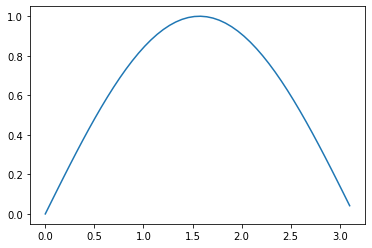

In [50]:
# Data 
xs = np.linspace(0,3.1,50)
#noise = np.random.normal(0,0.02,len(xs))
data = np.sin(xs)
print(data)
plt.plot(xs, data)

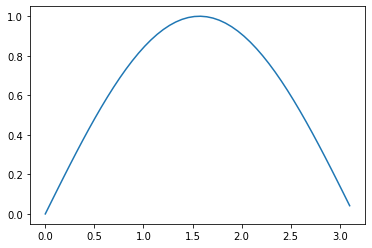

In [51]:
# a = np.array([ [  0.  ,   0.  ],[  0.3 ,   0.  ],[  1.25,  -0.1 ],
#               [  2.1 ,  -0.9 ],[  2.85,  -2.3 ],[  3.8 ,  -3.95],
#               [  5.  ,  -5.75],[  6.4 ,  -7.8 ],[  8.05,  -9.9 ],
#               [  9.9 , -11.6 ],[ 12.05, -12.85],[ 14.25, -13.7 ],
#               [ 16.5 , -13.8 ],[ 19.25, -13.35],[ 21.3 , -12.2 ],
#               [ 22.8 , -10.5 ],[ 23.55,  -8.15],[ 22.95,  -6.1 ],
#               [ 21.35,  -3.95],[ 19.1 ,  -1.9 ]])
a = np.column_stack((xs, data))

plt.plot(a[:, 0], a[:, 1])

In [52]:
dx_dt = np.gradient(a[:, 0])
dy_dt = np.gradient(a[:, 1])
velocity = np.array([ [dx_dt[i], dy_dt[i]] for i in range(dx_dt.size)])

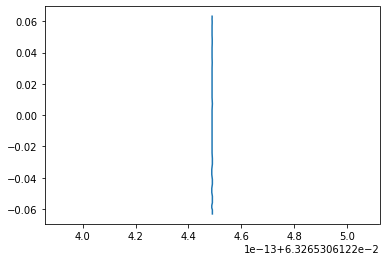

In [53]:
plt.plot(velocity[:, 0], velocity[:, 1])

In [54]:
ds_dt = np.sqrt(dx_dt * dx_dt + dy_dt * dy_dt)

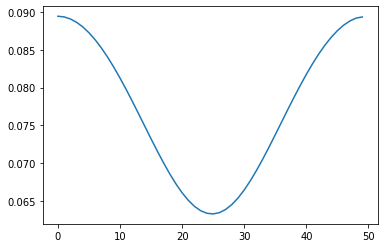

In [55]:
plt.plot(ds_dt)

In [56]:
tangent = np.array([1/ds_dt] * 2).transpose() * velocity

In [57]:
tangent_x = tangent[:, 0]
tangent_y = tangent[:, 1]

deriv_tangent_x = np.gradient(tangent_x)
deriv_tangent_y = np.gradient(tangent_y)

dT_dt = np.array([ [deriv_tangent_x[i], deriv_tangent_y[i]] for i in range(deriv_tangent_x.size)])

length_dT_dt = np.sqrt(deriv_tangent_x * deriv_tangent_x + deriv_tangent_y * deriv_tangent_y)

normal = np.array([1/length_dT_dt] * 2).transpose() * dT_dt

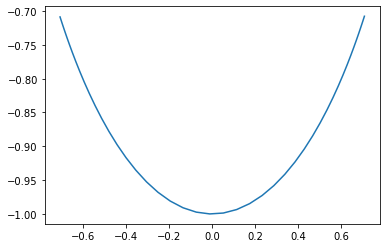

In [58]:
plt.plot(normal[:,0], normal[:, 1])

In [59]:
d2s_dt2 = np.gradient(ds_dt)
d2x_dt2 = np.gradient(dx_dt)
d2y_dt2 = np.gradient(dy_dt)

curvature = np.abs(d2x_dt2 * dy_dt - dx_dt * d2y_dt2) / (dx_dt * dx_dt + dy_dt * dy_dt)**1.5
t_component = np.array([d2s_dt2] * 2).transpose()
n_component = np.array([curvature * ds_dt * ds_dt] * 2).transpose()

acceleration = t_component * tangent + n_component * normal

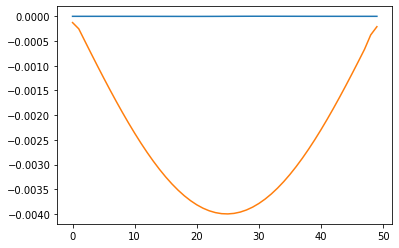

In [60]:
plt.plot(acceleration)